In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define parameters
height = 4
width = 12
start = (height - 1, 0)
goal = (height - 1, width - 1)
cliff = [(height - 1, i) for i in range(1, width - 1)]
actions = [(0, 1), (0, -1), (-1, 0), (1, 0)]  # right, left, up, down

In [3]:
# Initialize variables
V = np.zeros((height, width))
policy = np.zeros((height, width), dtype=int)

In [4]:
# Initialize parameters
gamma = 0.9  # discount factor
alpha = 0.1  # learning rate
epsilon = 0.1  # exploration rate

In [5]:
# Define reward function
R = -1 * np.ones((height, width))
for c in cliff:
    R[c] = -100
R[goal] = 0

In [6]:
# Q-learning algorithm
num_episodes = 1000
for _ in range(num_episodes):
    state = start
    while state != goal:
        if np.random.rand() < epsilon:
            action = np.random.choice(len(actions))
        else:
            action = policy[state]

        next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
        next_state = (max(0, min(next_state[0], height - 1)), max(0, min(next_state[1], width - 1)))
        reward = R[next_state]
        V[state] += alpha * (reward + gamma * np.max(V[next_state]) - V[state])
        state = next_state

In [7]:
# Determine optimal policy
for i in range(height):
    for j in range(width):
        if (i, j) == goal:
            continue
        max_reward = float("-inf")
        optimal_action = -1
        for a, action in enumerate(actions):
            next_state = (i + action[0], j + action[1])
            next_state = (max(0, min(next_state[0], height - 1)), max(0, min(next_state[1], width - 1)))
            if R[next_state] > max_reward:
                max_reward = R[next_state]
                optimal_action = a
        policy[i, j] = optimal_action

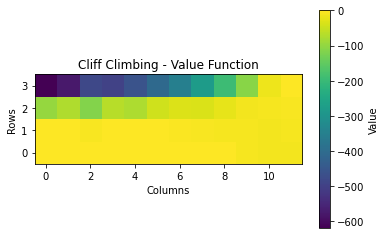

In [8]:
# Plotting
plt.imshow(V, cmap='viridis', origin='lower')
plt.colorbar(label='Value')
plt.title('Cliff Climbing - Value Function')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

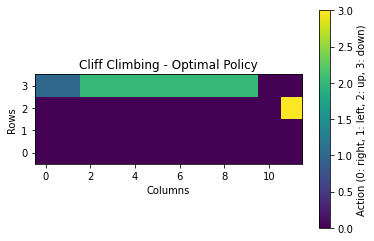

In [9]:
plt.imshow(policy, cmap='viridis', origin='lower')
plt.colorbar(label='Action (0: right, 1: left, 2: up, 3: down)')
plt.title('Cliff Climbing - Optimal Policy')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

This code implements Q-learning to find the optimal policy for navigating a cliff environment. It learns the optimal policy and value function through episodes of exploration and exploitation. Finally, it visualizes the learned value function and optimal policy.